它通过向损失函数中添加 L2正则项（2-范数）有效防止模型出现过拟合，且以助于解决非满秩条件下求逆困难的问题

sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
- alpha: 正则化强度，默认为 1.0
- fit_intercept: 默认为 True，计算截距项。
- normalize: 默认为 False，不针对数据进行标准化处理。
- copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- max_iter: 最大迭代次数，默认为 None。
- tol: 数据解算精度。
- solver: 根据数据类型自动选择求解器。
- random_state: 随机数发生器。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]


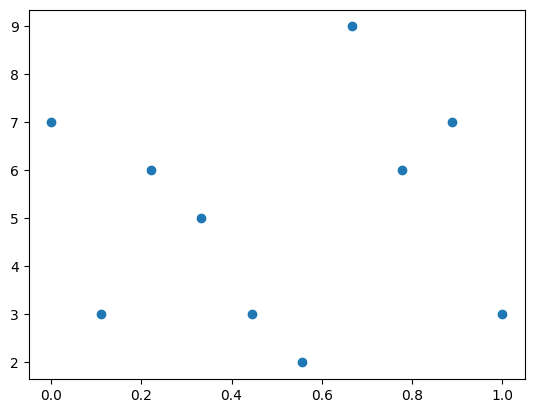

In [10]:
from scipy.linalg import hilbert

# x 自变量数据矩阵
x = hilbert(10)  # 使用 Scipy的hilbert()方法，生成 10x10 的希尔伯特矩阵, 希尔伯特矩阵每一列数据间都存在着较高的数值相关性。

# 模型参数
#np.random.seed(10)  # 随机数种子，能保证每次生成的随机数一致
#w = np.random.randint(2, 10, 10)  # 生成10个数为 w 系数
w = np.array([3,7,6,9,2,3,5,6,3,7])

# 拟合函数 y = w1 * x1 ＋ w2 * x2＋......＋ w10 * x10 = np.dot(x, w)

# y 因变量数据矩阵
y = np.dot(x, w)

print("实际参数 w: ", w)
print("实际函数值 y: ", y)
plt.scatter(np.linspace(1, 0, 10), w) # 实际参数

In [3]:
# 最小二乘法对 x, y数据集进行线性拟合 求解w, 实际参数和拟合参数 差距非常大
from scipy.optimize import leastsq

func = lambda p, x: np.dot(x, p)  # 函数公式
err_func = lambda p, x, y: func(p, x) - y  # 残差函数
p_init = np.random.randint(1, 2, 10)  # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解
best_params = parameters[0] # 最优拟合参数
print("拟合参数 w: ", best_params)

拟合参数 w:  [ 2.99996433  6.99997193  6.01830022  8.88747745  1.7711385   6.40883043
 -5.62901117 21.26483258 -7.60552279  9.88431687]


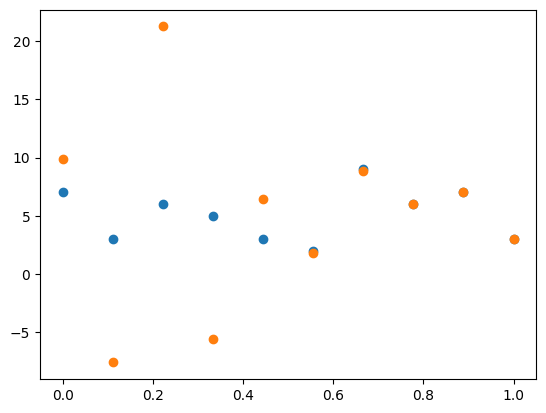

In [4]:
# 对比 实际参数 与 最小二乘法拟合参数
plt.scatter(np.linspace(1, 0, 10), w) # 实际参数
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合参数

In [5]:
# ridge_regression 岭回归推导

from sklearn.linear_model import Ridge

# 训练模型
ridge_model = Ridge(fit_intercept=False)  # 参数代表不增加截距项
ridge_model.fit(x, y)

# 打印模型参数: 比普通最小二乘法拟合的参数好很多
ridge_model.coef_  

array([6.3497497 , 4.32792068, 3.40228975, 2.83692059, 2.44632895,
       2.15683095, 1.93213214, 1.75189668, 1.60369747, 1.47944808])

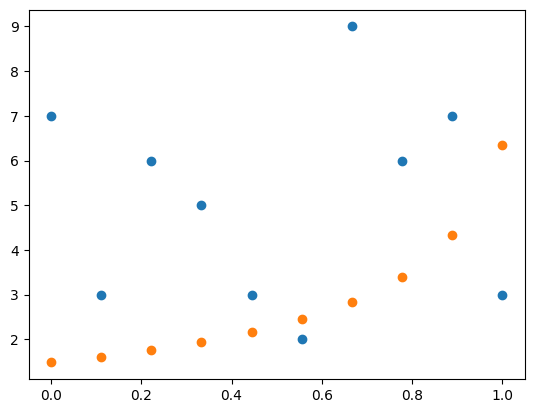

In [6]:
# 对比 实际参数 与 岭回归拟合参数
plt.scatter(np.linspace(1, 0, 10), w) # 实际参数
plt.scatter(np.linspace(1, 0, 10), ridge_model.coef_)  # 岭回归拟合参数

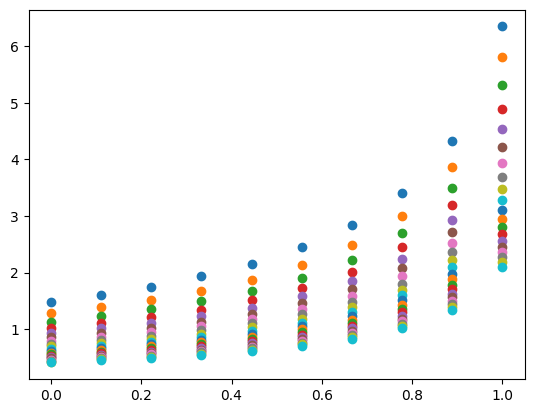

In [7]:
# 调整 alpha正则化强度

"""不同 alpha 参数拟合
"""
alphas = np.linspace(1, 10, 20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    plt.scatter(np.linspace(1, 0, 10), ridge.coef_)  # 岭回归拟合w参数

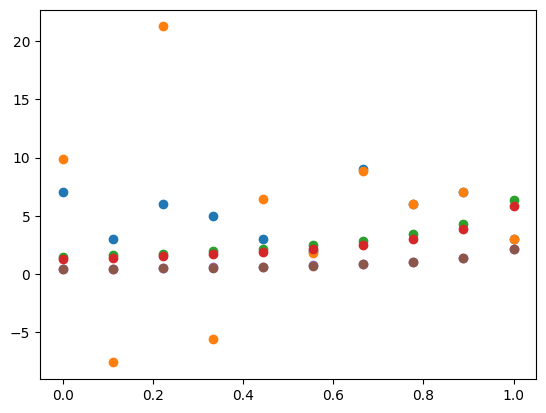

In [8]:
plt.scatter(np.linspace(1, 0, 10), w) # 实际w参数
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的w参数
plt.scatter(np.linspace(1, 0, 10), coefs[0])  # 岭回归拟合w参数
plt.scatter(np.linspace(1, 0, 10), coefs[1])  # 岭回归拟合w参数
plt.scatter(np.linspace(1, 0, 10), coefs[18])  # 岭回归拟合w参数
plt.scatter(np.linspace(1, 0, 10), coefs[19])  # 岭回归拟合w参数

Text(0.5, 1.0, 'Ridge Regression')

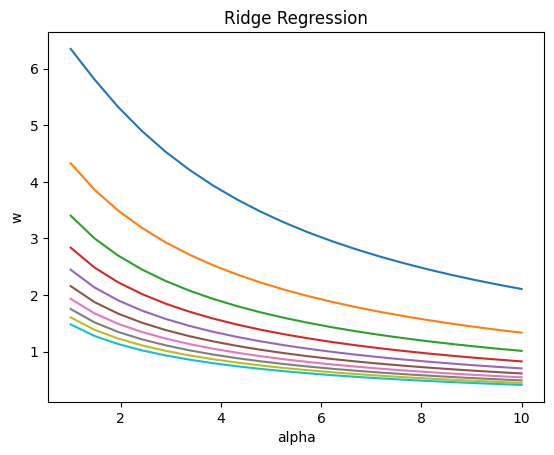

In [9]:
# 当 alpha 取值越大时，正则项主导收敛过程，各w系数趋近于 0。当 alpha 很小时，各w系数波动幅度变大。
"""绘制不同 alpha 参数结果
"""
plt.plot(alphas, coefs)  # 绘制不同 alpha 参数下的 w 拟合值

plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Ridge Regression")